# Zamana Bağlı Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: >

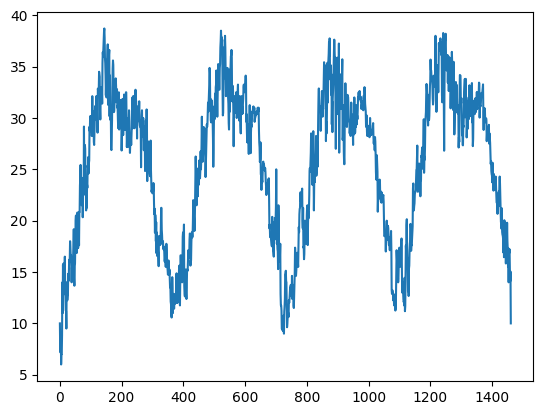

In [6]:
df.meantemp.plot()

In [12]:
px.line(df,x="date",y="meantemp",title="Mean Temperature")


In [8]:
px.line(df,x="date",y="humidity")

In [10]:
px.line(df,x="date",y="wind_speed")


In [11]:
px.line(df,x="date",y="meanpressure")

In [15]:
px.scatter(df,x="humidity",y="meantemp", size="meantemp",trendline="ols")


In [17]:
df["date"] = pd.to_datetime(df["date"],format="%Y-%m-%d")

In [20]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df.head()





,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5


In [32]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12,31
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000,2017,1,1


<Axes: xlabel='month', ylabel='meantemp'>

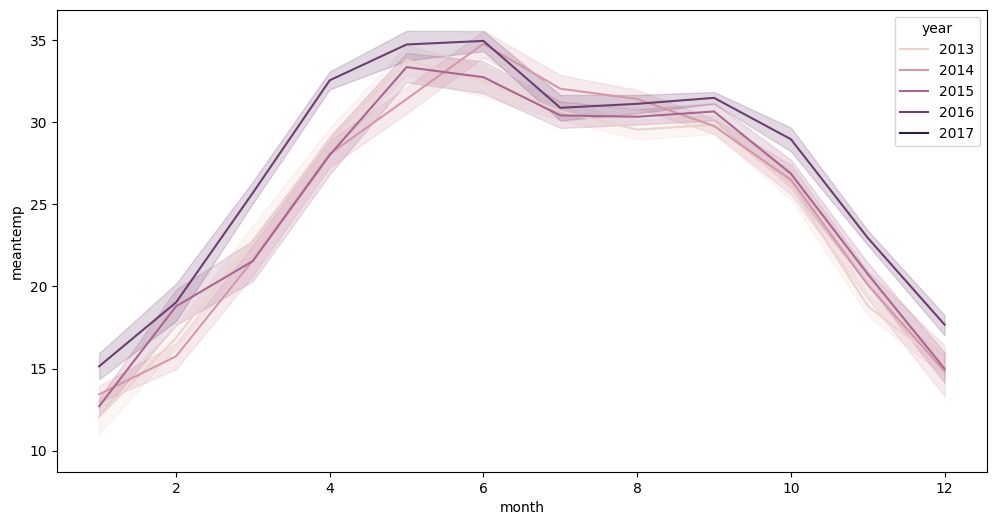

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x="month",y="meantemp",hue="year")

In [ ]:
prophet ds ve y yi tahmin etmek için kullanılır.

In [29]:
forecast_data = df.rename(columns={"date":"ds","meantemp":"y"})

In [33]:
from prophet import Prophet # Import Prophet
from prophet.plot import plot_plotly,plot_components_plotly # Import Prophet Plot
model = Prophet() # Prophet Model
model.fit(forecast_data) # Fit Model
forecast = model.make_future_dataframe(periods=365) # Predict
predictions = model.predict(forecast) # Predict
plot_plotly(model,predictions) # Plot Forecast

23:16:05 - cmdstanpy - INFO - Chain [1] start processing
23:16:06 - cmdstanpy - INFO - Chain [1] done processing
